In [9]:
#Recap of the code from Cirq

#Number to factorize 
N = 21

#Taking a number x with all the features as mentioned in the theory

import random as rand
import numpy as np

counter = 0

while (True):
    x = rand.randrange(2,N)
    counter += 1
    if np.gcd(x,N) == 1:
        break

print("The number x is: ", x, "at the count of: ", counter)
print()


#Fixing the target qubits

from math import ceil, log2, pi

L = ceil(log2(N))

e = 0.1

t = 2*L + 1 + ceil(log2(2 + 1/2*e))

print("N: ", N)
print("x is: ", x)
print("L :", L)
print("Error: ", e)
print("t: ", t)







The number x is:  4 at the count of:  2

N:  21
x is:  4
L : 5
Error:  0.1
t:  13


In [ ]:
#Defining the Unitary Operator U_{x} and the then doing the Inverse QFT on this unitary

import cirq
from cirq import H, SWAP
from cirq.circuits import InsertStrategy
from math import pi
import numpy as np




# Shor's Algorithm using Qiskit

Following code is currently not running

In [14]:
import random as rand
import numpy as np
from math import ceil, log2, pi, gcd
N = 21
# Pick a random n relatively prime with N
counter = 0
while True:
    n = rand.randrange(2, N)
    counter += 1
    if gcd(n, N) == 1:
        break
print(n, "is picked after", counter, "trials")
# Initialize the rest of parameters
L = ceil(log2(N))
e = 0.1
t = 2 * L + 1 + ceil(log2(2 + 1 / (2 * e)))
print("N =", N)
print("n =", n)
print("L =", L)
print("error =", e)
print("t =", t)
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
def opUn(N, n):
    k = 1
    while N > 2**k:
        k += 1
    u = np.zeros([2**k, 2**k], dtype=int)
    for i in range(N):
        u[n * i % N][i] = 1
    for i in range(N, 2**k):
        u[i][i] = 1
    return QuantumCircuit(u)
def myInvQFT(qubits):
    circuit = QuantumCircuit(len(qubits))
    n = len(qubits)
    for j in range(n // 2):
        circuit.swap(j, n - j - 1)
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            circuit.cu1(-pi / 2**(j - i), j, i)
        circuit.h(i)
    return circuit
# Quantum Phase Estimation Algorithm
qc = QuantumCircuit(t + L, t)
# Apply Hadamard gates to the qubits on the first register
for i in range(t):
    qc.h(i)
# Set the last qubit in second register to |1>
qc.x(t + L - 1)
Un = opUn(N, n)
for j in range(t):
    Unj = Un.power(2**j)
    qc.append(Unj.to_instruction(), [t - j - 1] + list(range(t, t + L)))
# Apply inverse QFT
inv_qft = myInvQFT(range(t))
qc.append(inv_qft.to_instruction(), range(t))
# Measure
qc.measure(range(t), range(t))
# Execute the circuit
simulator = AerSimulator()
tqc = transpile(qc, simulator)
qobj = assemble(tqc, shots=1000)
result = simulator.run(qobj).result()
counts = result.get_counts()
# Convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)
print("Outcomes in binary:")
binary_outcomes = {bitstring(format(key, 'b').zfill(t)): val for key, val in counts.items()}
print(binary_outcomes)
print()
print("Outcomes in decimal:")
print(counts)
print()
for outcome in counts:
    print(outcome, "\tobserved", counts[outcome], "times")
# Discard 0 and the outcomes with low frequency
good = [int(outcome) for outcome in counts if outcome != 0 and counts[outcome] > 10]
print(good)
# Load the contFrac and convergents functions
def contFrac(x):
    cf = []
    while x % 1 != 0:
        x = 1 / x
        cf.append(int(x))
        x = x - int(x)
    return cf
def convergents(cf):
    n0, n1 = 0, 1
    d0, d1 = 1, 0
    for q in cf:
        n = q * n1 + n0
        d = q * d1 + d0
        n0, n1 = n1, n
        d0, d1 = d1, d
    return n1, d1
# Run continued fractions algorithm to find out r
for b in good:
    print("for b =", b)
    cf = contFrac(b / 2**t)
    print(cf)
    cv = convergents(cf)
    print(cv)
    print()
# Check if r is even, and n^{r/2} is not equal to -1 Mod N
r = 6  # Adjust as necessary
if r % 2 == 0 and (n**(r // 2)) % N != -1:
    print("Proceed")
else:
    print("Repeat the algorithm")
# Compute gcd to find out the factors of N
print("N =", N)
print("n =", n)
print("r =", r)
print("(n**int(r/2) - 1) =", (n**int(r/2) - 1))
print("(n**int(r/2) + 1) =", (n**int(r/2) + 1))
print("Factors of", N, ":", gcd((n**int(r/2) - 1), N), "and", gcd((n**int(r/2) + 1), N))

20 is picked after 2 trials
N = 21
n = 20
L = 5
error = 0.1
t = 14


CircuitError: "Circuit args must be Registers or integers. (['ndarray'] '(array([[1, 0, 0, ..., 0, 0, 0],\n       [0, 0, 0, ..., 0, 0, 0],\n       [0, 0, 0, ..., 0, 0, 0],\n       ...,\n       [0, 0, 0, ..., 1, 0, 0],\n       [0, 0, 0, ..., 0, 1, 0],\n       [0, 0, 0, ..., 0, 0, 1]]),)' was provided)"

### Writing the whole theory for Shor's Algorithm as a whole

##### FIRST STEP:  Quantum Phase Estimation

It is the process to estimate the phase of a quantum state

Suppose we have a Unitary Operator U, it's eigen state $|u\rangle$ and suppose the eigenvalue is $e^{2\pi i \phi}$, where $\phi$ is the phase of the system. We can define it as:
$$U|u\rangle = e^{2\pi i \phi}|u\rangle$$

Now, we have the following circuit system which we will require to estimate the phase value

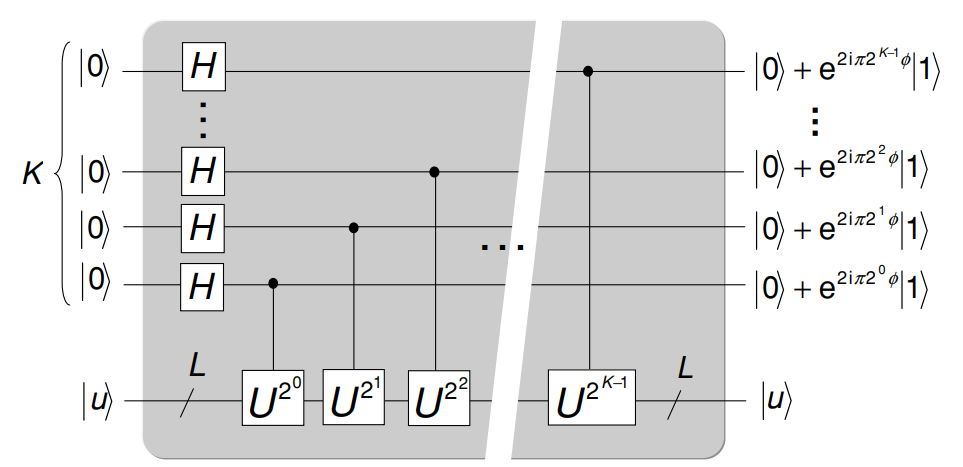

So as input register we have $|0\rangle^{\otimes k}$ of K size and the size of the second register $|u\rangle$ is L. Let's calculate the value of the output registers.

- First The initial state:
$$|0\rangle^{\otimes k}|u\rangle$$
- Second we apply Hadamard to the first K input registers:
$$\frac{1}{2^{k/2}}(|0\rangle+|1\rangle|u\rangle$$
- Third we apply the Controlled Unitary Operator $U^{j}$
(Where, j = $2^0, 2^1, ... ,2^{k-1} $)

The Controlled Unitary only operates when the target qubit is 1
So we get: 
$$CU^{j}[(|0\rangle+|1\rangle \otimes |u\rangle]\\(|0\rangle \otimes |u\rangle) + (|1\rangle \otimes e^{2\pi i \phi j}|u\rangle\\(|0\rangle + e^{2\pi i \phi j} |1\rangle) \otimes |u\rangle$$

We can then write it also as:
$$\frac{1}{2^{k/2}} [(|0\rangle + e^{2\pi i \phi 2^{0}}|1\rangle)(|0\rangle + e^{2\pi i \phi 2^{1}}|1\rangle)...(|0\rangle + e^{2\pi i \phi 2^{k-1}}|1\rangle)] \otimes |u\rangle$$

In compact form we can write it as: (Considering $2^{k} = N$)
$$\frac{1}{\sqrt N}\sum_{k = 0}^{N - 1}e^{2\pi i \phi k}|k\rangle\otimes|u\rangle $$

Let us throw some light on the behaviors of the $\phi$</br>
We can write the real number $\phi = 0.\phi_{1},\phi_{2},...,\phi_{k}$ in the binary form as:  

$\phi = \frac{\phi_{1}}{2}+ \frac{\phi_{2}}{4} + ... + \frac{\phi_{k}}{2^{k}}$

Now, 
$$2^{k- 1}\phi = 2^{k- 1}(\frac{\phi_{1}}{2}+ \frac{\phi_{2}}{4} + ... + \frac{\phi_{k}}{2^{k}})\\
= \{2^{k-2}\phi_{1}+ 2^{k-1}\phi_{2} + ... + 2^{0}\phi_{k-1}\} + ( \frac{\phi_{k}}{2}+ \frac{\phi_{k+1}}{4}+...)$$
and for,
$$2^{k- 2}\phi = 2^{k- 2}(\frac{\phi_{1}}{2}+ \frac{\phi_{2}}{4} + ... + \frac{\phi_{k}}{2^{k}})\\
= \{2^{k-2}\phi_{1}+ 2^{k-3}\phi_{2} + ... + 2^{0}\phi_{k-2}\} + ( \frac{\phi_{k-1}}{2}+ \frac{\phi_{k}}{4}+...)$$

This way we can reduce the exponential integeres as: 
$$e^{2\pi i \phi 2^{k-1}} = 2^{{\pi i}( \frac{\phi_{k}}{2}+ \frac{\phi_{k-1}}{4}+...)}\\e^{2\pi i \phi 2^{k-2}} = 2^{{\pi i}( \frac{\phi_{k-2}}{2}+ \frac{\phi_{k-1}}{4}+...)}\\...\\e^{2\pi i \phi 2^{0}} = 2^{{\pi i}( \frac{\phi_{1}}{2}+ \frac{\phi_{2}}{4}+...)}$$

Now, let us assume that
$$\Omega_{m} = \sum_{l =1}^{m}\frac{\phi_{k- m + l}}{2^{l}}$$

It changes the way we reduced the exponential integers: 

$$e^{2\pi i \phi 2^{k-1}} = e^{2 \pi i \Omega_{1}}( \frac{\phi_{k+1}}{4}+...)\\e^{2\pi i \phi 2^{k-2}} = e^{2 \pi i \Omega_{2}}( \frac{\phi_{k+1}}{8}+...)\\...\\e^{2\pi i \phi 2^{0}} = e^{2 \pi i \Omega_{k}}( \frac{\phi_{k+1}}{2^{k+1}}+...)$$

Now, the thing is we considered only K bits for the input integer because of that reason all the k+1, ...  bits are 0, hence can be ignored and we can thus write the equation:

$$\frac{1}{2^{k/2}} [(|0\rangle + e^{2\pi i \phi 2^{0}}|1\rangle)(|0\rangle + e^{2\pi i \phi 2^{1}}|1\rangle)...(|0\rangle + e^{2\pi i \phi 2^{k-1}}|1\rangle)] \otimes |u\rangle$$
as, 
$$\frac{1}{2^{k/2}} [(|0\rangle + e^{2\pi i \Omega_{1}}|1\rangle)(|0\rangle + e^{2\pi i \Omega_{2}}|1\rangle)...(|0\rangle + e^{2\pi i \Omega_{k}}|1\rangle)] \otimes |u\rangle$$

Now, if we do the Inverse quantum fourier transform in the states, we can recover the state $\phi$ which is the phase of the quantum system
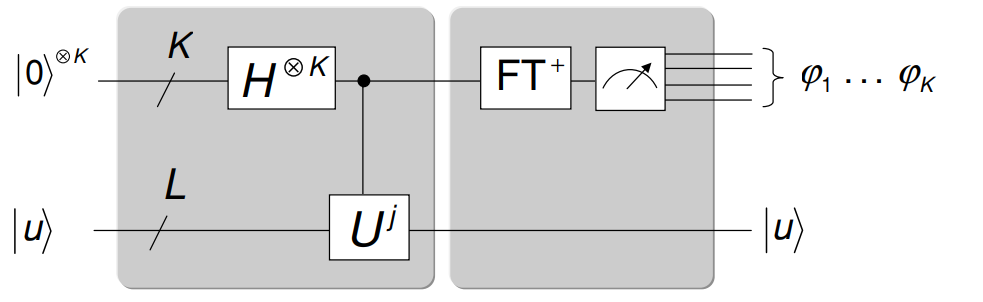

We can thus write the mathematical calculations as the following: 
$$|0\rangle^{\otimes k} |u\rangle \\ \frac{1}{\sqrt N}\sum_{k = 0}^{N-1}e^{2\pi i k \phi}|k\rangle|u\rangle\\\frac{1}{\sqrt N}\sum_{k = 0}^{N-1}e^{2\pi i k \phi}(\frac{1}{2^{k/2}} \sum_{n = 0}^{N-1}e^{\frac{-2\pi i k n}{N}}|n\rangle)|u\rangle\\\\\frac{1}{N}\sum_{n =0}^{N-1}\sum_{k = 0}^{N-1}e^{\frac{-2\pi i k n}{N}}e^{2 \pi i k \phi}|n\rangle|u\rangle\\\frac{1}{N}\sum_{n =0}^{N-1}\frac{1 - e^{2 \pi i (\phi - \frac{n}{N})N}}{1 - e^{2 \pi i (\phi - \frac{n}{N})}}|n\rangle|u\rangle$$
Now, suppose we can to take the measurement in n associated with a probability $P(n)$:

$$P(n) = \frac{1}{N^{2}}\rvert(\frac{1 - e^{2 \pi i (\phi - \frac{n}{N})N}}{1 - e^{2 \pi i (\phi - \frac{n}{N})}})\rvert^{2}\\\frac{1}{N^{2}}\frac{sin^{2}[\pi (\phi - \frac{n}{N})N]}{sin^{2}[\pi (\phi - \frac{n}{N})]}$$

Now the measurement of this gives the value of the probabilistic $\tilde{\phi}$ phase, which is:

$$\tilde{\phi} = \frac{n}{N}$$ 
and the accuracy of it depends on delta when

$$\delta = \phi - \tilde{\phi}$$ 
is minimal
Thus the final out is of the form $|\tilde{\phi}\rangle|u\rangle$

it is theorized that we get the most accurate representation of the phase when we take the following value for the K input registers:

$K = l + \lceil \log_{2}(2+ \frac{1}{2\epsilon})\rceil$ l taken as, $(l = 2L + 1)$ and $L = \lceil(log_{2}N)\rceil$

##### SECOND STEP:  Order Finding



Assume, two positive co-prime numbers x,N; x<N and gcd(x,N) = 1. The order of it will be the smallest integer r for which we will get:

$$x^{r} = 1(\mod N)$$
But how does exactly QPE will solve for the order of this problmem?

Let us take a Unitary Operator $U_{x,N}$ which acts on $|y\rangle = |0\rangle, |1\rangle$ as:
$$U_{x,N}|y\rangle = |x y (\mod N)\rangle$$

For simplicity we consider $U_{x,N} = U$

Consider, $|u\rangle_{s = 0,1,2,...r-1}$ as a set of eigenstates for U for corresponding eigenvalues of the form $e^{\frac{2 \pi i s}{r}}$, thus:

$$U|u\rangle_{s} = e^{\frac{2 \pi i s}{r}}|u\rangle_{s}$$

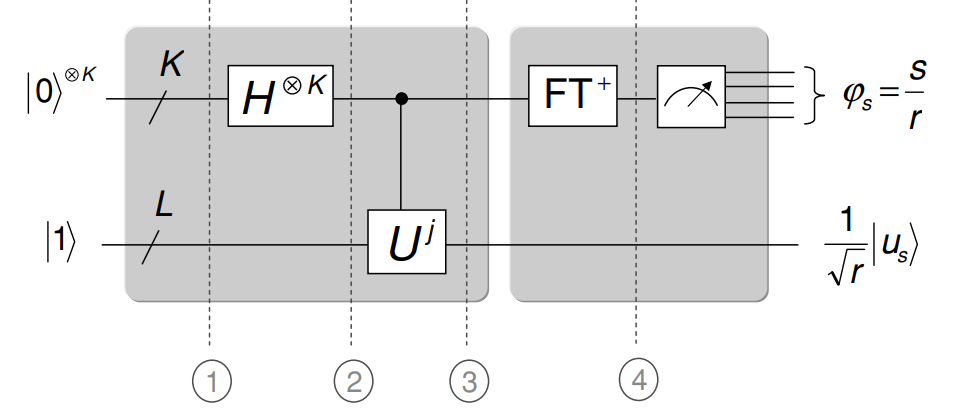


The eigenstates are defined as:

$$|u\rangle_{s} = \frac{1}{\sqrt r}\sum_{s = 0}^{r - 1}e^{-\frac{2\pi i s}{r}}|x^{k}(\mod N)\rangle$$

We can further find out that:
$$\frac{1}{\sqrt r}\sum_{s = 0}^{r - 1}|u_{s}\rangle = |1\rangle$$
This is a good result as we can't define the state $|u\rangle$ without the knowledge of the phase. With this result we need to only define it as a state $|1\rangle$. Morever,
$$\frac{1}{\sqrt r}\sum_{s = 0}^{r - 1}e^{\frac{2\pi i k s}{r}}|u_{s}\rangle = |x^{k}(\mod N)\rangle$$ 

Hence, second register can be given only the state $|1\rangle$ in the $L$ register form 



It is evident to say that, for $j = 2^0, 2^1,...2^{k-1} = 1, ... ,k$:
$$CU^{j}(|0\rangle \otimes |1\rangle) = |1\rangle\\ CU^{j}(|1\rangle \otimes|1\rangle = |x^{j} \mod(N)\rangle$$

Let us define step by step for 1,2,3 and 4:

Step -1: Initialize the states

$$|\psi_{1}\rangle = |0\rangle^{\otimes k}|1\rangle$$

Step - 2: Apply the Hadmard

$$|\psi_{2}\rangle = \frac{1}{\sqrt M}(|0\rangle + |1\rangle)^{\otimes k} |1\rangle = \frac{1}{\sqrt M}\sum_{j = 0}^{M - 1}|j\rangle \otimes |1\rangle$$

Step - 3: Apply the $CU^{j}$ on the second register

$$|\psi_{3}\rangle = \frac{1}{\sqrt M}\sum_{j = 0}^{M - 1}CU^{j}|j\rangle \otimes |1\rangle = \frac{1}{\sqrt{M}}\sum_{j = 0}^{M - 1} |j\rangle|x^{j} (\mod N)\rangle$$

Now, as we know the property:
$$\frac{1}{\sqrt r}\sum_{s = 0}^{r - 1}e^{\frac{2\pi i k s}{r}}|u_{s}\rangle = |x^{k}(\mod N)\rangle$$ 

We will do this, 
$$|\psi_{3}\rangle = \frac{1}{\sqrt M}\sum_{k = 0}^{M-1}|k\rangle \otimes \frac{1}{\sqrt{r}}\sum_{s = 0}^{r - 1}e^{\frac{2\pi i k s}{r}}|u_{s}\rangle$$

Now taking $\phi_{s} = \frac{s}{r}$ and changing the $|j\rangle$ basis to $|k\rangle$

$$|\psi_{3}\rangle = \sum_{s= 0}^{r - 1}(\frac{1}{\sqrt M} \sum_{k = 0}^{M-1}e^{2\pi i k \phi_{s}}|j\rangle)\otimes \frac{1}{\sqrt r}|u_{s}\rangle$$

Step -4: Performing Inverse Fourier Transform we can get the approximation of the eigenstate of the $\tilde{\phi}$, as before the measurement we have the state:

$$|\psi_{4}\rangle = \frac{1}{\sqrt r}\sum_{s =0}^{r-1}{|\tilde{\phi_{s}}\rangle}\otimes |u_{s}\rangle$$

Thus, finally we get the approximation $\tilde{\phi_{s}} \approx \phi  = \frac{s}{r}$

Now, from the post processing we attain the value of r using the fact that $\frac{s}{r}<1$

1- Randomly choose $x \in [2, N-2]$

   Calculate $\text{GCD}(x, N)$, and if $> 1$, redo

2- Find $r$, the order of $x$ modulo $N$

   > Make measurement of quantum phase $\tilde{\varphi} = s'/r'$

   > Get $r$ through the continued fraction expansion of $\tilde{\varphi}$

   > Check that $x^r = 1 \mod N$, and if not, redo

   > Check that $r$ is even and $x^{r/2} \neq -1 \mod N$, if not go to 1

3- Calculate $N' = \text{GCD}(y + 1, N)$, $N'' = \text{GCD}(y - 1, N)$

4- Factorize $N', N''$ (as applicable)


Step by step process to generate the code:

In [ ]:
#Randomly choose the value of x for the N

"""
Some things to keep in mind
- x<N ; gcd(x, N) = 1 if not then choose another x as the current one already a factor of N
"""

import random as rand
from math import log2, ceil
import numpy as np

N = 21

counter  = 0

while True:
    x = rand.randrange(2,N)
    counter += 1
    if np.gcd(x,N) == 1